<a href="https://colab.research.google.com/github/csumithra/sampleProjects/blob/master/regression_mpg_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Use seaborn for pairplot
!pip install -q seaborn

In [2]:
from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 2us/step


'/root/.keras/datasets/auto-mpg.data'

In [4]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 

raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()

dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [0]:
dataset = dataset.dropna()

In [0]:
origin = dataset.pop('Origin')

In [8]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


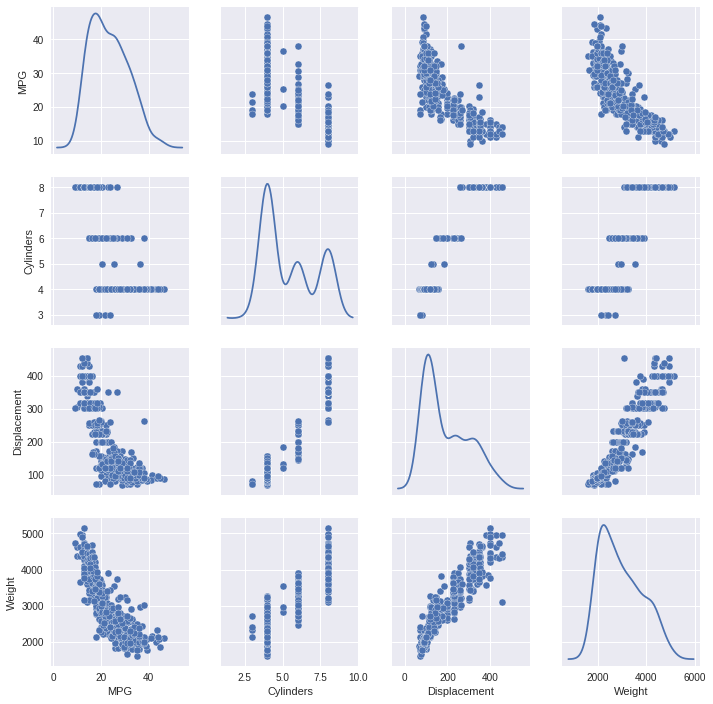

In [9]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [10]:
dataset.describe()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,0.625000,0.173469,0.201531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.484742,0.379136,0.401656
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = dataset.drop('MPG', axis=1)
y = dataset['MPG']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(313, 9) (79, 9) (313,) (79,)


In [15]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
220,4,85.0,70.0,1945.0,16.8,77,0.0,0.0,1.0
256,6,225.0,100.0,3430.0,17.2,78,1.0,0.0,0.0
301,4,105.0,70.0,2200.0,13.2,79,1.0,0.0,0.0
193,6,200.0,81.0,3012.0,17.6,76,1.0,0.0,0.0
57,4,113.0,95.0,2278.0,15.5,72,0.0,0.0,1.0


In [0]:
### Apply Standard Scaler

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
sc_X = StandardScaler()

In [19]:
scaled_train = sc_X.fit_transform(X_train)
scaled_test = sc_X.fit_transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
len(scaled_train)

313

In [24]:
len(scaled_test)

79

In [25]:
scaled_train

array([[-0.8576193 , -1.04611368, -0.8984236 , ..., -1.28551249,
        -0.45149325,  1.95330095],
       [ 0.32752348,  0.31263257, -0.1059203 , ...,  0.77789987,
        -0.45149325, -0.51195388],
       [-0.8576193 , -0.85200708, -0.8984236 , ...,  0.77789987,
        -0.45149325, -0.51195388],
       ...,
       [-0.8576193 , -0.74524844, -0.76633972, ..., -1.28551249,
         2.21487254, -0.51195388],
       [ 0.32752348,  0.55526583, -0.42292162, ...,  0.77789987,
        -0.45149325, -0.51195388],
       [ 0.32752348, -0.21145527, -0.18517063, ...,  0.77789987,
        -0.45149325, -0.51195388]])

In [0]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(X_train.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mean_squared_error',
                optimizer=optimizer,
                metrics=['mean_absolute_error', 'mean_squared_error'])
  return model

In [33]:
model = build_model()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [35]:
example_batch = scaled_train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 0.19506975],
       [ 0.33475026],
       [ 0.06584735],
       [ 0.1877726 ],
       [ 0.11718598],
       [ 0.61137867],
       [ 0.4873047 ],
       [ 0.0442529 ],
       [-0.17602414],
       [ 0.272299  ]], dtype=float32)

In [36]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  scaled_train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

Instructions for updating:
Use tf.cast instead.

....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................

In [37]:
type(history)

tensorflow.python.keras.callbacks.History

In [40]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error
995,2.008640,0.927850,2.008640,6.326530,2.033743,6.326530
996,2.015030,0.933963,2.015030,7.789246,2.222949,7.789247
997,2.001192,0.910007,2.001192,6.186141,2.035115,6.186141
998,2.211237,0.941540,2.211237,6.110816,2.022319,6.110816
999,2.071979,0.954884,2.071979,6.423251,2.060804,6.423252


In [41]:
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_absolute_error,mean_squared_error,val_loss,val_mean_absolute_error,val_mean_squared_error,epoch
995,2.008640,0.927850,2.008640,6.326530,2.033743,6.326530,995
996,2.015030,0.933963,2.015030,7.789246,2.222949,7.789247,996
997,2.001192,0.910007,2.001192,6.186141,2.035115,6.186141,997
998,2.211237,0.941540,2.211237,6.110816,2.022319,6.110816,998
999,2.071979,0.954884,2.071979,6.423251,2.060804,6.423252,999


In [0]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

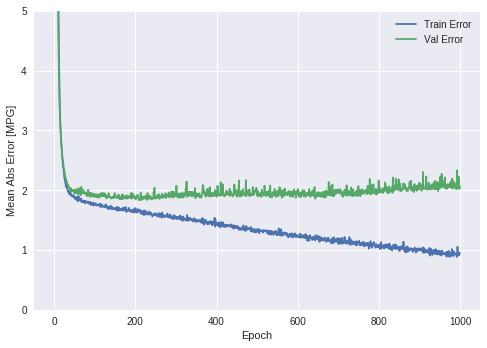

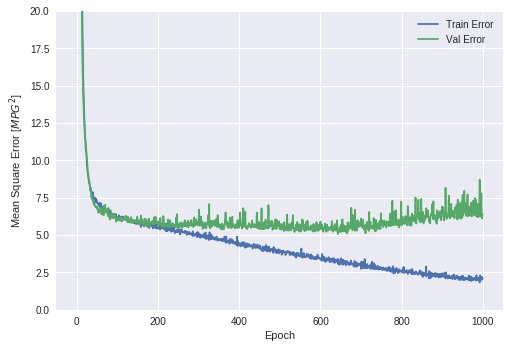

In [43]:
plot_history(history)

In [0]:
#This graph shows little improvement, or even degradation in the validation error after about 100 epochs. Let's update the model.fit call to automatically stop training when the validation score doesn't improve. We'll use an EarlyStopping callback that tests a training condition for every epoch. If a set amount of epochs elapses without showing improvement, then automatically stop the training.


..................................................................

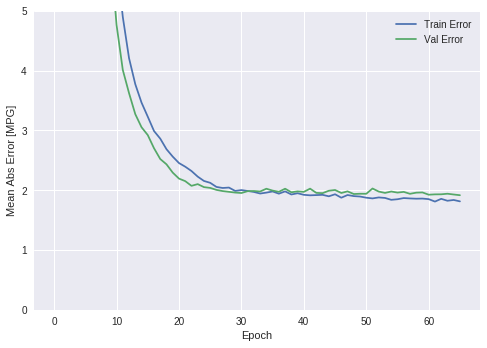

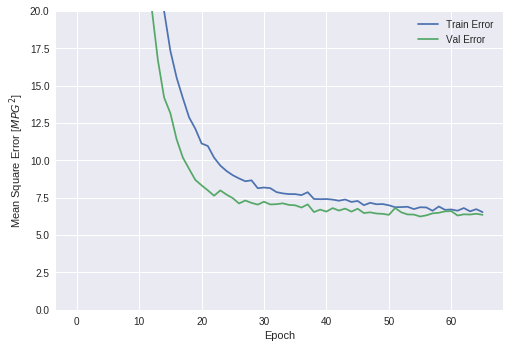

In [45]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(scaled_train, y_train, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [0]:
#The graph shows that on the validation set, the average error is usually around +/- 2 MPG.

In [0]:
#Let's see how well the model generalizes by using the test set, which we did not use when training the model. 

In [48]:
loss, mae, mse = model.evaluate(scaled_test, y_test, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.73 MPG


In [0]:
## Make predictions

In [0]:
test_predictions = model.predict(scaled_test).flatten()

In [51]:
test_predictions

array([29.169882 , 24.028805 , 12.824709 , 36.973087 , 35.5      ,
       20.562178 , 37.133373 , 30.243895 , 18.844877 , 26.39086  ,
       27.25435  , 14.737571 , 23.377052 , 14.082106 , 18.412539 ,
       35.319073 , 24.478378 , 13.308797 , 24.777777 , 25.38801  ,
       18.40717  , 15.268828 , 20.953932 , 26.558027 , 32.51291  ,
       13.152352 , 28.934216 , 25.089842 , 18.993025 , 15.332021 ,
       19.442842 , 34.36915  , 22.59966  , 28.633501 , 18.393019 ,
       30.59624  , 30.861546 , 14.308524 , 15.341787 , 13.503909 ,
       14.255815 , 36.552635 , 32.98769  , 14.370277 , 29.829268 ,
       16.058758 , 30.747198 , 13.791236 , 16.833904 , 19.42055  ,
       26.066515 , 15.2376995, 11.64532  , 22.200293 , 32.398987 ,
       28.978941 , 26.106413 , 18.214418 , 33.103928 , 23.922045 ,
       19.983267 , 27.09126  , 31.343988 , 13.017856 , 25.350496 ,
       15.891842 , 13.823586 , 29.144827 , 21.004805 , 36.316265 ,
       35.124554 , 30.805485 , 20.011187 , 16.248535 , 19.4414

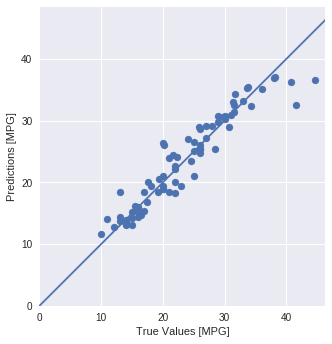

In [52]:
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

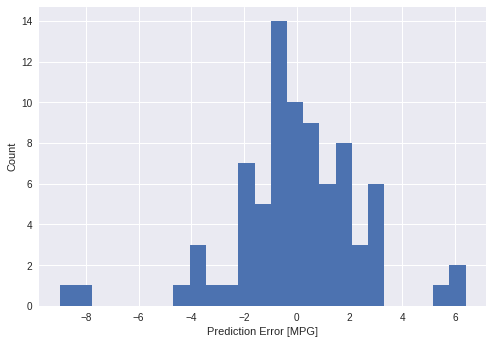

In [53]:
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [0]:
#It's not quite gaussian, but we might expect that because the number of samples is very small.